## PR曲线与ROC曲线

In [1]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target == 9] = 0
y[digits.target != 9] = 1

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
log_reg = LogisticRegression(n_jobs=-1)
X_train,X_test,y_train,y_test = train_test_split(X,y)
log_reg.fit(X_train,y_train)
decision_scores = log_reg.decision_function(X_test)
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

J:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
J:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [8]:
import matplotlib.pyplot as plt

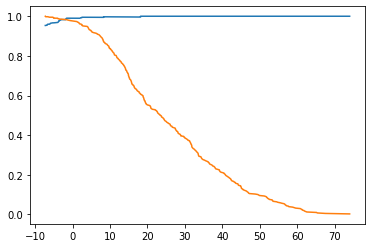

In [9]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.show()

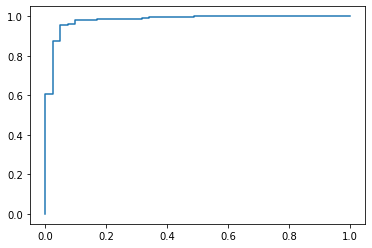

In [11]:
fprs,tprs,thresholds = roc_curve(y_test,decision_scores)
plt.plot(fprs,tprs)
plt.show()